In [1]:
#Correlation is defined as the statistical association between two variables.
#A relationship is linear when the points on a scatterplot follow a somewhat straight line pattern.
#Lets exmine through scatterplot the kind of relationship between CO(GT) and NOx(GT) for the given dataset.

In [1]:
#Import dependencies
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#Create dataframe
df = pd.read_excel('/Users/bbaidya/q3/AirQuality.xlsx')
#Display & examine some data
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [3]:
df.tail()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9352,2005-04-04,10:00:00,3.1,1314.25,-200,13.529605,1101.25,471.7,538.50,189.8,1374.25,1728.50,21.850,29.250,0.756824
9353,2005-04-04,11:00:00,2.4,1162.50,-200,11.355157,1027.00,353.3,603.75,179.2,1263.50,1269.00,24.325,23.725,0.711864
9354,2005-04-04,12:00:00,2.4,1142.00,-200,12.374538,1062.50,293.0,603.25,174.7,1240.75,1092.00,26.900,18.350,0.640649
9355,2005-04-04,13:00:00,2.1,1002.50,-200,9.547187,960.50,234.5,701.50,155.7,1041.00,769.75,28.325,13.550,0.513866
9356,2005-04-04,14:00:00,2.2,1070.75,-200,11.932060,1047.25,265.2,654.00,167.7,1128.50,816.00,28.500,13.125,0.502804


Text(-0.11899999999999977, 0.5, 'NOx(GT)')

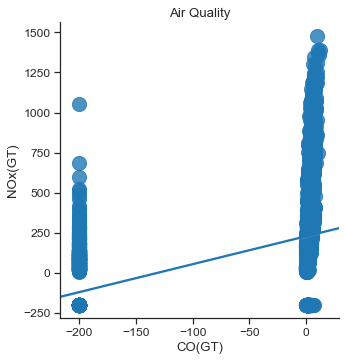

In [4]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
# Create scatterplot of dataframe
sns.lmplot('CO(GT)', # Horizontal axis
           'NOx(GT)', # Vertical axis
           data=df, # Data source
           fit_reg=True, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 200}) # S marker size

# Set title
plt.title('Air Quality')
# Set x-axis label
plt.xlabel('CO(GT)')
# Set y-axis label
plt.ylabel('NOx(GT)')

In [5]:
#For the given dataset lot of rows has CO(GT) values has -200 for different NOx(GT) values.
#It could be missing/wrong/default value, lets omit those data 
cleansed_df = df[(df['CO(GT)'] != -200) & (df['NOx(GT)'] != -200)]
cleansed_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


Text(0.13100000000000023, 0.5, 'NOx(GT)')

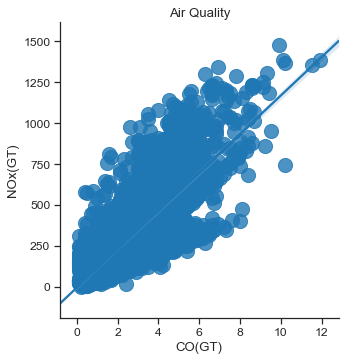

In [6]:
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")
# Create scatterplot of dataframe
sns.lmplot('CO(GT)', # Horizontal axis
           'NOx(GT)', # Vertical axis
           data=cleansed_df, # Data source
           fit_reg=True, # Don't fix a regression line
           scatter_kws={"marker": "D", # Set marker style
                        "s": 200}) # S marker size

# Set title
plt.title('Air Quality')
# Set x-axis label
plt.xlabel('CO(GT)')
# Set y-axis label
plt.ylabel('NOx(GT)')

In [7]:
#df.shape
cleansed_df.shape

(7261, 15)

In [8]:
#Lets examine the corelation
print(cleansed_df.corr())

                 CO(GT)  PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  \
CO(GT)         1.000000     0.468385  0.165570  0.077025       0.601009   
PT08.S1(CO)    0.468385     1.000000  0.180600  0.863677       0.935293   
NMHC(GT)       0.165570     0.180600  1.000000  0.045417       0.122239   
C6H6(GT)       0.077025     0.863677  0.045417  1.000000       0.787448   
PT08.S2(NMHC)  0.601009     0.935293  0.122239  0.787448       1.000000   
NOx(GT)        0.795054     0.336683 -0.119984  0.013327       0.423478   
PT08.S3(NOx)  -0.565768     0.142925  0.059465  0.542936      -0.004588   
NO2(GT)        0.677537     0.301650 -0.021896  0.006686       0.383191   
PT08.S4(NO2)   0.383935     0.847958  0.191944  0.780285       0.880519   
PT08.S5(O3)    0.652265     0.893554  0.101492  0.656286       0.909612   
T             -0.069596     0.772472  0.011458  0.973826       0.695538   
RH            -0.050604     0.776323  0.013906  0.933638       0.629947   
AH            -0.073793  

In [9]:
#The corelation for CO(GT) and NOx(GT) is 0.795054 which is a strong corelation and the
#scatter plot shows a linear relationship between them we can conclude that they have a linear relationship.

In [10]:
#Lets extract CO(GT) and NOx(GT) and try to fit them into a linear regression model
minimised_df = cleansed_df[['CO(GT)','NOx(GT)']]
#minimised_df.head()

In [11]:
#Import lib for linear regression
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# change data for fitting into regression model
x = minimised_df['CO(GT)']
y = minimised_df['NOx(GT)']
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)

# test & train data and fit into regression model.
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
lr = LinearRegression()  
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [12]:
# get co-effiecient and intercept of the model
print(lr.intercept_)
print(lr.coef_)

[-2.33264764]
[[116.99341683]]


In [13]:
# lets test test data set and create a data frame for test actual and test predicted values
y_pred = lr.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df.head()

,Actual,Predicted
0,211.5,301.850236
1,177.0,173.157478
2,344.0,559.235753
3,174.1,79.562744
4,135.0,161.458136


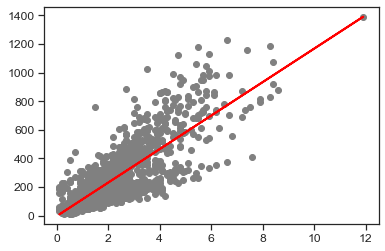

In [14]:
# lets see the test data and regression 
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [15]:
# get errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 93.47177203394949
Mean Squared Error: 16072.703300069035
Root Mean Squared Error: 126.77816570714783


In [16]:
# WE CAN USE NUMPY AS EXPLAINED BELOW 

Text(0, 0.5, 'NOx(GT)')

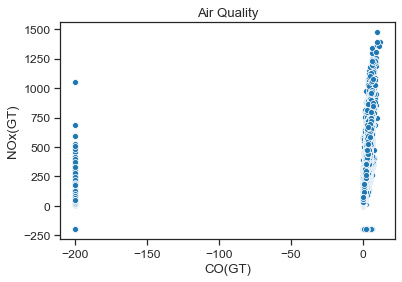

In [17]:
import numpy as np
pdf = pd.read_excel('/Users/bbaidya/q3/AirQuality.xlsx')
npa = np.asarray(pdf)
npa.shape
npa[:,2]
npa[:,7]
sns.scatterplot(npa[:,2], npa[:,7])
# Set title
plt.title('Air Quality')
# Set x-axis label
plt.xlabel('CO(GT)')
# Set y-axis label
plt.ylabel('NOx(GT)')

Text(0, 0.5, 'NOx(GT)')

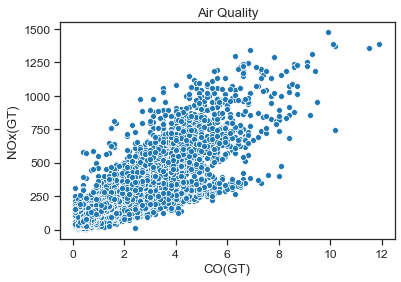

In [18]:
arr = npa[npa[:,2] != -200]
arr = arr = arr[arr[:,7] != -200]
arr.shape
sns.scatterplot(arr[:,2], arr[:,7])
# Set title
plt.title('Air Quality')
# Set x-axis label
plt.xlabel('CO(GT)')
# Set y-axis label
plt.ylabel('NOx(GT)')

In [19]:
np.corrcoef(arr[:,2].astype('float64'), arr[:,7].astype('float64'))

array([[1.        , 0.79505362],
       [0.79505362, 1.        ]])

In [20]:
X = arr[:,2]
y = arr[:,7]

alpha = -3.699495988519544
beta = 117.42469281511589


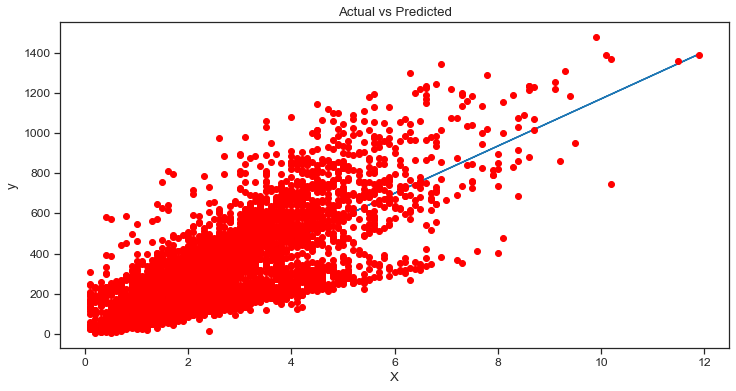

rms error is: 304.7398047186137


In [21]:
df = pd.DataFrame({'X': X, 'y': y})
xmean = np.mean(X) 
ymean = np.mean(y)
# Calculate the terms needed for the numerator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

pred = []
for x in X:
    pred.append(alpha + beta*x)

ypred = np.array(pred)
# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')


plt.show()

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

rmse_val = rmse(np.array(X), np.array(ypred))
print("rms error is: " + str(rmse_val))